In [1]:
!uv pip install -U kaleido kaleidoscope
!plotly_get_chrome

Using Python 3.11.13 environment at: /usr
Resolved 123 packages in 1.22s
⠙ Preparing packages... (0/54)
⠙ Preparing packages... (0/54)
fqdn       ------------------------------     0 B/8.91 KiB
⠙ Preparing packages... (0/54)
ipython-pygments-lexers ------------------------------     0 B/7.88 KiB
fqdn       ------------------------------     0 B/8.91 KiB
⠙ Preparing packages... (0/54)
logistro   ------------------------------     0 B/7.71 KiB
ipython-pygments-lexers ------------------------------     0 B/7.88 KiB
fqdn       ------------------------------     0 B/8.91 KiB
⠙ Preparing packages... (0/54)
logistro   ------------------------------     0 B/7.71 KiB
ipython-pygments-lexers ------------------------------     0 B/7.88 KiB
fqdn       ------------------------------     0 B/8.91 KiB
⠙ Preparing packages... (0/54)
logistro   ------------------------------     0 B/7.71 KiB
ipython-pygments-lexers ------------------------------     0 B/7.88 KiB
fqdn       -----------------------------

In [2]:
!pip install numpy --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 2.3.2 which is incompatible.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.30.0 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 9.4.0 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 7.4.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, b

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import os
from IPython.display import Image, display, HTML
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import time
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

 # Financial Transaction Fraud Detection Analysis

 In this comprehensive analysis, I'll build a machine learning model to detect fraudulent financial transactions. My approach focuses on:
 - Exploratory data analysis to understand transaction patterns
 - Strategic feature engineering to capture fraud indicators
 - Building and evaluating XGBoost classifier for fraud detection

 The dataset contains various transaction types including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER operations.

In [2]:
df_org = pd.read_csv("Fraud.csv")
df = df_org.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,151799.000000,1.517990e+05,1.517990e+05,1.517980e+05,1.517980e+05,1.517980e+05,151798.000000,151798.0
mean,9.333902,1.791774e+05,8.879109e+05,9.043402e+05,9.137641e+05,1.180076e+06,0.000863,0.0
std,1.906281,3.401606e+05,2.807531e+06,2.844268e+06,2.384389e+06,2.705635e+06,0.029364,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.111398e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.122687e+04,1.999000e+04,0.000000e+00,3.164400e+04,9.332977e+04,0.000000,0.0
75%,11.000000,2.230398e+05,1.956685e+05,2.262719e+05,6.869059e+05,1.120989e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


 # Exploratory Data Analysis & Data Cleaning

 I'll start by examining the data quality and understanding the structure of my dataset.

In [4]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [5]:
df[df['amount'].isna()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [6]:
# I need to handle missing values before proceeding with analysis
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df.duplicated().sum()

np.int64(0)

 # Feature Engineering Strategy

 Based on my domain knowledge of financial transactions, I'll create features that can effectively capture fraudulent behavior patterns.

 ## Time-Based Feature Engineering

 I'm extracting temporal patterns since fraud often follows specific timing patterns:
 - **Hour of day**: Fraudulent activities might spike during off-hours
 - **Day patterns**: Weekend vs weekday transaction behaviors
 - **Transaction frequency**: Rapid successive transactions can indicate fraud

In [9]:
df['hour'] = df['step'] % 24
df['dd'] = (df['step'] // 24)
df['day'] = (df['step'] // 24) % 7  # 0=Monday, 6=Sunday

 ## Transaction Type Analysis

 I'm encoding transaction types since fraud patterns vary significantly across different transaction categories.

In [10]:
df = pd.get_dummies(df, columns=['type'], prefix='type')

 ## Balance & Transaction Amount Features

 These features capture the most critical fraud indicators:

 **Sender Account Analysis:**
 - Balance changes reveal account draining patterns
 - Zero balance flags indicate complete account emptying
 - Transaction-to-balance ratios show disproportionate transfers

In [11]:
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['is_empty_orig'] = (df['newbalanceOrig'] == 0).astype(int)
df['amount_to_balance_ratio'] = np.where(
    df['oldbalanceOrg'] > 0,
    df['amount'] / df['oldbalanceOrg'],
    0
)

 **Recipient Account Analysis:**
 - Balance changes in destination accounts
 - Merchant identification (accounts starting with 'M')

In [12]:
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['is_merchant'] = df['nameDest'].str.startswith('M').astype(int)

 ## Behavioral Pattern Features

 I'm creating features that capture suspicious transaction behaviors and patterns.

In [13]:
df['sender_recipient_count'] = df.groupby(['nameOrig','nameDest'])['amount'].transform('count')

# Flagging unusually large transactions (above 90th percentile)
high_amount_threshold = df['amount'].quantile(0.9)
df['is_high_amount'] = (df['amount'] > high_amount_threshold).astype(int)

 ## System Flag Analysis

 I'm analyzing the difference between actual fraud and system-flagged fraud to understand detection gaps.

In [14]:
df['is_missed_fraud'] = ((df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)).astype(int)

In [15]:
df.head(20)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,type_PAYMENT,type_TRANSFER,balance_change_orig,is_empty_orig,amount_to_balance_ratio,balance_change_dest,is_merchant,sender_recipient_count,is_high_amount,is_missed_fraud
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,...,True,False,9839.64,0,0.057834,0.00,1,1,0,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,...,True,False,1864.28,0,0.087735,0.00,1,1,0,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,...,False,True,181.00,1,1.000000,0.00,0,1,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,...,False,False,181.00,1,1.000000,-21182.00,0,1,0,1
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,...,True,False,11668.14,0,0.280795,0.00,1,1,0,0
5,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,...,True,False,7817.71,0,0.145149,0.00,1,1,0,0
6,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,...,True,False,7107.77,0,0.038799,0.00,1,1,0,0
7,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,...,True,False,7861.64,0,0.044646,0.00,1,1,0,0
8,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,...,True,False,2671.00,1,1.506687,0.00,1,1,0,0
9,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,...,False,False,5337.77,0,0.127943,-1549.21,0,1,0,0


 # Visual Analysis of Engineered Features

 I'll create visualizations to understand how my engineered features relate to fraud detection.

In [17]:

# Assuming 'df' has all the engineered features
features_to_plot = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    'balance_change_orig', 'is_empty_orig', 'amount_to_balance_ratio',
    'balance_change_dest', 'is_merchant', 'sender_recipient_count', 'is_high_amount',
    'is_missed_fraud'
]

# Add one-hot encoded transaction types (if available)
transaction_types = [col for col in df.columns if col.startswith('type_')]
features_to_plot.extend(transaction_types)
# Create a directory for plots if it doesn't exist
if not os.path.exists("plots"):
    os.makedirs("plots")

# --- BOX PLOTS ---
for feature in features_to_plot:
    fig = px.box(
        df, # Or df if you're not sampling
        y=feature,
        title=f'Box Plot of {feature}',
        color='isFraud'
    )
    fig.update_layout(yaxis_title=feature)
    # Save as PNG
    pio.write_image(fig, f"plots/{feature}_box.png", scale=2) # scale=2 for higher resolution
    # fig.show() # Optional: Comment out if you only want to save

# --- VIOLIN PLOTS ---
for feature in features_to_plot:
    fig = px.violin(
        df, # Or df if you're not sampling
        y=feature,
        title=f'Violin Plot of {feature}',
        color='isFraud',
        box=True,
        points="outliers" # Or False
    )
    fig.update_layout(yaxis_title=feature)
    # Save as PNG
    pio.write_image(fig, f"plots/{feature}_violin.png", scale=2)
    # fig.show() # Optional: Comment out if you only want to save

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


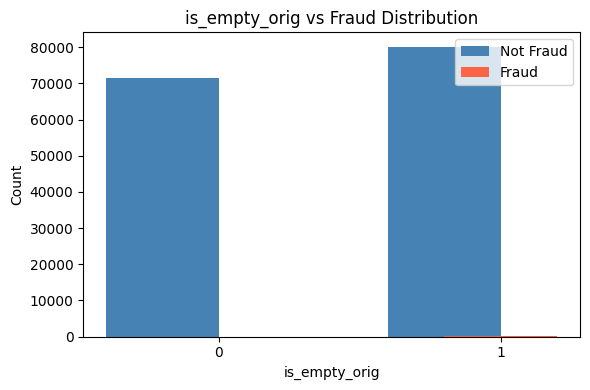

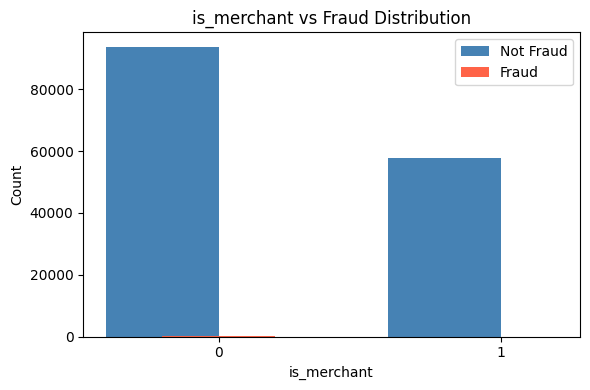

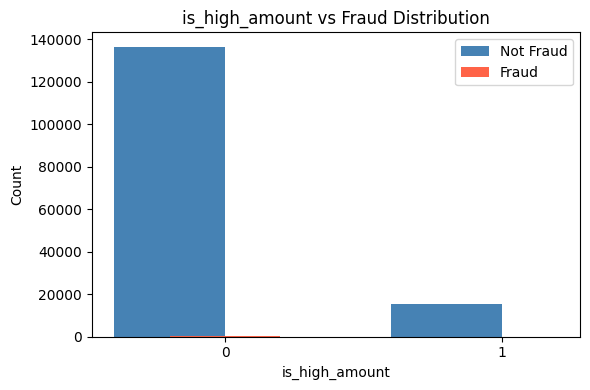

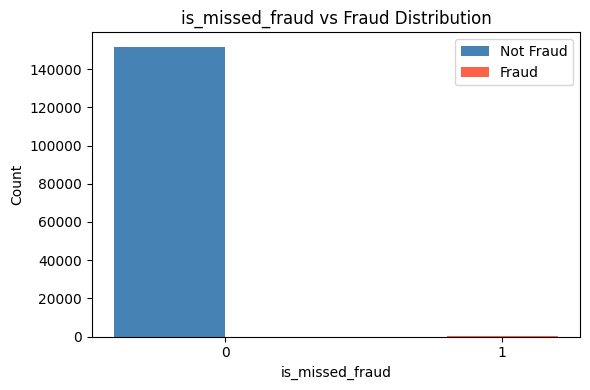

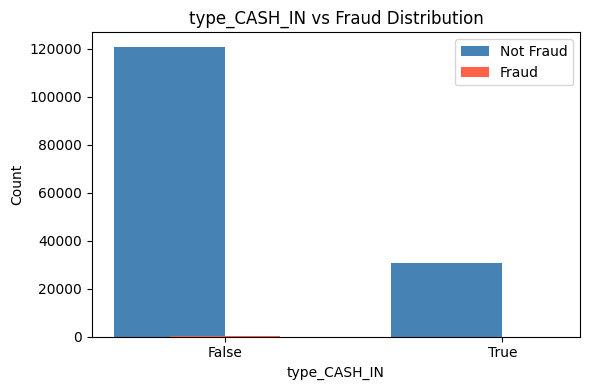

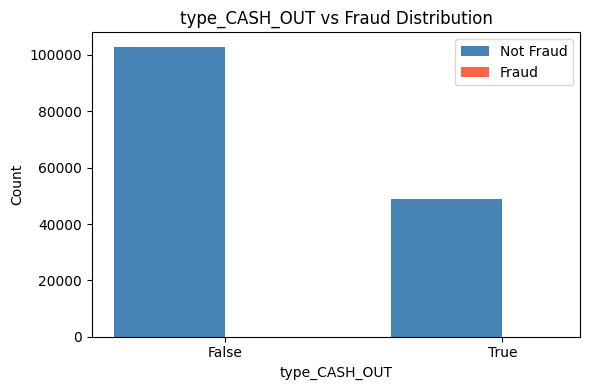

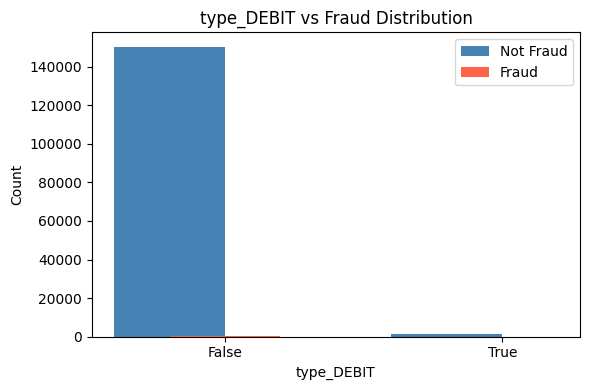

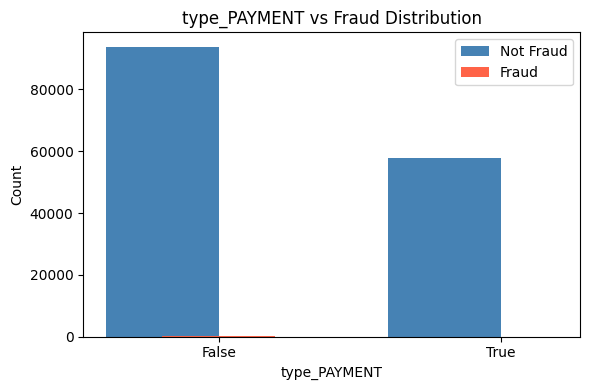

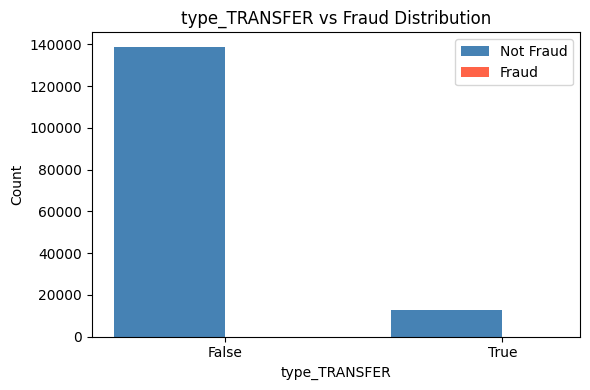

In [18]:
# Creating count plots for binary features since box plots aren't suitable for categorical data
features_to_plot = [
    'is_empty_orig', 'is_merchant', 'is_high_amount', 'is_missed_fraud'
]
transaction_types = [col for col in df.columns if col.startswith('type_')]
features_to_plot.extend(transaction_types)

for feature in features_to_plot:
    counts = df.groupby([feature, 'isFraud']).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(6, 4))
    x = range(len(counts))

    ax.bar(x, counts[0], width=0.4, label='Not Fraud', align='center', color='steelblue')
    ax.bar(x, counts[1], width=0.4, label='Fraud', align='edge', color='tomato')

    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(counts.index.astype(str))
    ax.set_title(f'{feature} vs Fraud Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend()

    plt.tight_layout()
    plt.show()

 ## Feature Variance Analysis

 I'm analyzing feature variance to understand which features have the most variability and might be most informative.

In [19]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
variance_values = df[numerical_features].var().sort_values(ascending=False)

fig = px.bar(
    x=variance_values.index,
    y=variance_values.values,
    title="Feature Variance Analysis - Identifying High-Variance Features",
    labels={'x': 'Features', 'y': 'Variance'},
    color=variance_values.values,
    color_continuous_scale='Viridis'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

 ## Correlation Analysis

 I'll examine correlations to understand feature relationships and identify potential multicollinearity issues.

In [20]:
# Original features correlation
org_numerical_features = df_org.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_org[org_numerical_features].corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    hoverongaps=True
))
fig.update_layout(
    title="Original Features Correlation Matrix",
    xaxis_tickangle=-45,
    width=800,
    height=800
)
fig.show()

In [21]:
# Engineered features correlation
corr_matrix = df[numerical_features].corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    hoverongaps=True
))
fig.update_layout(
    title="All Features Correlation Matrix (Including Engineered Features)",
    xaxis_tickangle=-45,
    width=800,
    height=800
)
fig.show()

In [22]:
# Analyzing correlation with target variable
fraud_corr = df[numerical_features].corr()['isFraud'].sort_values(ascending=False)
print("Features Correlation with Fraud Target:\n", fraud_corr)

top_features = fraud_corr.abs().sort_values(ascending=False).index[1:6]
sns.pairplot(df[top_features + ['isFraud']], hue='isFraud', corner=True)
plt.show()

Features Correlation with Fraud Target:
 isFraud                    1.000000
is_missed_fraud            1.000000
balance_change_orig        0.128379
amount                     0.036440
is_empty_orig              0.026850
is_high_amount             0.012638
balance_change_dest        0.006210
amount_to_balance_ratio   -0.000952
oldbalanceOrg             -0.003055
newbalanceDest            -0.005379
oldbalanceDest            -0.008401
newbalanceOrig            -0.009078
is_merchant               -0.023074
hour                      -0.045986
step                      -0.045986
isFlaggedFraud                  NaN
dd                              NaN
day                             NaN
sender_recipient_count          NaN
Name: isFraud, dtype: float64


KeyError: "None of [Index(['is_missed_fraudisFraud', 'balance_change_origisFraud', 'stepisFraud',\n       'hourisFraud', 'amountisFraud'],\n      dtype='object')] are in the [columns]"

 # Feature Selection Strategy

 Based on my analysis, I'm implementing a strategic approach to feature selection:

 ## ✅ Features I'm Keeping:
 - **amount**: Core transaction feature with strong predictive power
 - **balance_change_orig/dest**: Captures account behavior patterns
 - **amount_to_balance_ratio**: Derived risk metric
 - **is_merchant**: Important recipient type indicator
 - **is_high_amount**: Captures threshold-based fraud patterns
 - **is_empty_orig**: Strong signal of account draining

 ## ❌ Features I'm Removing:
 - **step, dd, day, hour**: No significant correlation with fraud
 - **oldbalance/newbalance columns**: Replaced by more informative delta features
 - **isFlaggedFraud**: Low correlation, system-dependent
 - **sender_recipient_count**: Replaced with more robust destination analysis

In [28]:
# I'm adding destination transaction frequency as it's more informative than sender-recipient pairs
df['dest_txn_count'] = df['nameDest'].map(df['nameDest'].value_counts())

In [29]:
# Creating my final feature set
filtered_df = df.drop(columns=[
    'step', 'dd', 'day', 'hour',
    'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig',
    'isFlaggedFraud', 'is_missed_fraud', 'sender_recipient_count',
    'nameDest', 'nameOrig'
])

print(f"Final feature set contains {len(filtered_df.columns)} features")
print("Features:", list(filtered_df.columns))

Final feature set contains 14 features
Features: ['amount', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_change_orig', 'is_empty_orig', 'amount_to_balance_ratio', 'balance_change_dest', 'is_merchant', 'is_high_amount', 'dest_txn_count']


In [30]:
filtered_df.head()

,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_change_orig,is_empty_orig,amount_to_balance_ratio,balance_change_dest,is_merchant,is_high_amount,dest_txn_count
0,9839.64,0.0,False,False,False,True,False,9839.64,0,0.057834,0.0,1,0,1
1,1864.28,0.0,False,False,False,True,False,1864.28,0,0.087735,0.0,1,0,1
2,181.00,1.0,False,False,False,False,True,181.00,1,1.000000,0.0,0,0,8
3,181.00,1.0,False,True,False,False,False,181.00,1,1.000000,-21182.0,0,0,5
4,11668.14,0.0,False,False,False,True,False,11668.14,0,0.280795,0.0,1,0,1


 # Data Preprocessing for Machine Learning

 I'm preparing the data for model training with appropriate scaling techniques.

In [34]:
# Identify your high-variance numerical columns (from your previous analysis)
high_variance_cols = [
    'amount','balance_change_orig', 'balance_change_dest', 'amount_to_balance_ratio'
    # 'sender_recipient_count' might also be good to scale if its range is large
]

# Ensure only numeric columns from the list are selected and handle potential NaNs
numeric_high_variance_cols = filtered_df[high_variance_cols].select_dtypes(include=np.number).columns
if filtered_df[numeric_high_variance_cols].isnull().any().any():
    print("Warning: High variance columns contain NaNs. Consider handling them before scaling (e.g., imputation).")
    # For demonstration, we'll fill NaNs with median, but choose your imputation strategy wisely
    for col in numeric_high_variance_cols:
        if filtered_df[col].isnull().any():
            filtered_df[col] = filtered_df[col].fillna(filtered_df[col].median())


# Separate features (X) and target (y)
X = filtered_df.drop('isFraud', axis=1) # Assuming 'isFraud' is your target
y = filtered_df['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Option 3: Robust Scaling (If your data has many outliers)
print("\nApplying RobustScaler...")
scaler = RobustScaler()
scaler.fit(X_train[numeric_high_variance_cols])
X_train[numeric_high_variance_cols] = scaler.transform(X_train[numeric_high_variance_cols])
X_test[numeric_high_variance_cols] = scaler.transform(X_test[numeric_high_variance_cols])
print("Robust Scaling complete.")

# Your X_train and X_test DataFrames now have the selected high-variance columns scaled.
# You can now proceed with model training.

print("\nExample of scaled 'amount' in X_train:")
print(X_train['amount'].describe())


Applying RobustScaler...
Robust Scaling complete.

Example of scaled 'amount' in X_train:
count    121438.000000
mean          0.557164
std           1.614575
min          -0.290161
25%          -0.237685
50%           0.000000
75%           0.762315
max          46.765709
Name: amount, dtype: float64


In [36]:
# Calculate variance for numerical features
numerical_features = filtered_df.select_dtypes(include=['float64', 'int64']).columns
variance_values = filtered_df[numerical_features].var().sort_values(ascending=False)

# Plot variance
fig = px.bar(
    x=variance_values.index,
    y=variance_values.values,
    title="Feature Variance Analysis",
    labels={'x': 'Features', 'y': 'Variance'},
    color=variance_values.values,
    color_continuous_scale='Viridis'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

 # Feature Importance & Selection Analysis

 I'm using multiple approaches to understand feature importance and validate my feature engineering decisions.

In [37]:
# Random Forest feature importance analysis
print("Analyzing feature importance using Random Forest...")
rf_model_for_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_for_importance.fit(X_train, y_train)

feature_importances = pd.Series(rf_model_for_importance.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("Top 10 Most Important Features:")
print(feature_importances_sorted.head(10))

Analyzing feature importance using Random Forest...
Top 10 Most Important Features:
amount_to_balance_ratio    0.545639
balance_change_orig        0.158389
amount                     0.114357
balance_change_dest        0.107523
is_empty_orig              0.029192
dest_txn_count             0.021265
type_TRANSFER              0.009665
type_CASH_OUT              0.008031
is_high_amount             0.003270
type_CASH_IN               0.001179
dtype: float64


In [38]:
# Recursive Feature Elimination with different estimators
print("Performing Recursive Feature Elimination...")

# Using Logistic Regression (scale-sensitive)
estimator_lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
rfe_selector_lr = RFE(estimator=estimator_lr, n_features_to_select=10, step=1)
rfe_selector_lr.fit(X_train, y_train)

selected_features_lr = X_train.columns[rfe_selector_lr.support_]
print(f"Top 10 features selected by RFE (Logistic Regression): {list(selected_features_lr)}")

# Using Random Forest (scale-insensitive)
estimator_rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe_selector_rf = RFE(estimator=estimator_rf, n_features_to_select=10, step=1)
rfe_selector_rf.fit(X_train, y_train)

selected_features_rf = X_train.columns[rfe_selector_rf.support_]
print(f"Top 10 features selected by RFE (Random Forest): {list(selected_features_rf)}")

Performing Recursive Feature Elimination...
Top 10 features selected by RFE (Logistic Regression): ['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_change_orig', 'is_empty_orig', 'is_merchant', 'is_high_amount']
Top 10 features selected by RFE (Random Forest): ['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_TRANSFER', 'balance_change_orig', 'is_empty_orig', 'amount_to_balance_ratio', 'balance_change_dest', 'is_high_amount', 'dest_txn_count']


 # XGBoost Model Training & Evaluation

 I'm implementing XGBoost as my primary classifier due to its excellent performance on imbalanced datasets and ability to handle mixed data types effectively.

In [39]:
print("Training XGBoost Classifier for Fraud Detection...")

# Calculating scale_pos_weight to handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Class imbalance ratio (scale_pos_weight): {scale_pos_weight:.2f}")

# Configuring XGBoost with optimal parameters for fraud detection
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.1,
    scale_pos_weight=scale_pos_weight,  # Critical for imbalanced fraud data
    random_state=42,
    n_jobs=-1
)

# Training with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

print("XGBoost model training completed successfully!")

Training XGBoost Classifier for Fraud Detection...
Class imbalance ratio (scale_pos_weight): 1155.55
[0]	validation_0-auc:0.98825
[1]	validation_0-auc:0.97726
[2]	validation_0-auc:0.98387
[3]	validation_0-auc:0.98011
[4]	validation_0-auc:0.97796
[5]	validation_0-auc:0.97780
[6]	validation_0-auc:0.97672
[7]	validation_0-auc:0.97704
[8]	validation_0-auc:0.97693
[9]	validation_0-auc:0.96656
[10]	validation_0-auc:0.96664
[11]	validation_0-auc:0.96689
[12]	validation_0-auc:0.96690
[13]	validation_0-auc:0.96693
[14]	validation_0-auc:0.96692


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:06:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




[15]	validation_0-auc:0.96684
[16]	validation_0-auc:0.96527
[17]	validation_0-auc:0.96528
[18]	validation_0-auc:0.97594
[19]	validation_0-auc:0.97594
[20]	validation_0-auc:0.97602
[21]	validation_0-auc:0.97602
[22]	validation_0-auc:0.97594
[23]	validation_0-auc:0.97609
[24]	validation_0-auc:0.97609
[25]	validation_0-auc:0.97575
[26]	validation_0-auc:0.97499
[27]	validation_0-auc:0.97499
[28]	validation_0-auc:0.97389
[29]	validation_0-auc:0.97714
[30]	validation_0-auc:0.97528
[31]	validation_0-auc:0.97529
[32]	validation_0-auc:0.97527
[33]	validation_0-auc:0.97525
[34]	validation_0-auc:0.97526
[35]	validation_0-auc:0.97521
[36]	validation_0-auc:0.97522
[37]	validation_0-auc:0.97522
[38]	validation_0-auc:0.97399
[39]	validation_0-auc:0.97402
[40]	validation_0-auc:0.97370
[41]	validation_0-auc:0.97370
[42]	validation_0-auc:0.97257
[43]	validation_0-auc:0.97257
[44]	validation_0-auc:0.97256
[45]	validation_0-auc:0.97253
[46]	validation_0-auc:0.97252
[47]	validation_0-auc:0.97252
[48]	valid

 # Model Performance Evaluation

 I'm evaluating the model using multiple metrics since fraud detection requires balancing precision and recall.

Evaluating Model Performance...
Model Performance Metrics:
  Accuracy:  0.9998
  Precision: 0.8276 (Critical: Minimizes false fraud alerts)
  Recall:    0.9231 (Critical: Catches actual fraud)
  F1-Score:  0.8727
  ROC AUC:   0.9890

Confusion Matrix Analysis:
True Negatives:  30,329 (Correctly identified non-fraud)
False Positives: 5 (False fraud alerts)
False Negatives: 2 (Missed fraud cases)
True Positives:  24 (Correctly caught fraud)


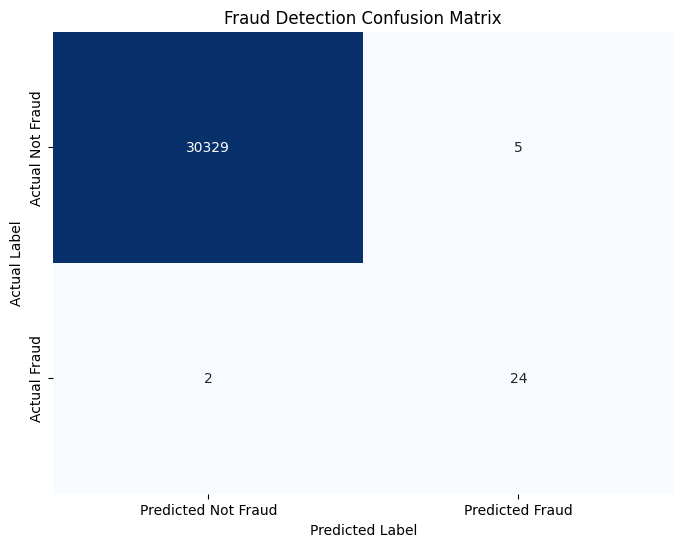

In [40]:
print("Evaluating Model Performance...")

# Generating predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculating comprehensive metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Performance Metrics:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f} (Critical: Minimizes false fraud alerts)")
print(f"  Recall:    {recall:.4f} (Critical: Catches actual fraud)")
print(f"  F1-Score:  {f1:.4f}")
print(f"  ROC AUC:   {roc_auc:.4f}")

# Detailed confusion matrix analysis
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix Analysis:")
print(f"True Negatives:  {cm[0,0]:,} (Correctly identified non-fraud)")
print(f"False Positives: {cm[0,1]:,} (False fraud alerts)")
print(f"False Negatives: {cm[1,0]:,} (Missed fraud cases)")
print(f"True Positives:  {cm[1,1]:,} (Correctly caught fraud)")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title('Fraud Detection Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

 # Final Feature Importance Analysis

 I'm analyzing which features the trained XGBoost model found most valuable for fraud detection.

Analyzing Final Feature Importance from Trained XGBoost Model...
Top 10 Features by XGBoost Importance:
 1. amount_to_balance_ratio   0.3294
 2. is_merchant               0.2721
 3. type_PAYMENT              0.0991
 4. is_empty_orig             0.0689
 5. type_CASH_IN              0.0477
 6. balance_change_orig       0.0445
 7. type_DEBIT                0.0371
 8. type_TRANSFER             0.0250
 9. type_CASH_OUT             0.0239
10. amount                    0.0180


/tmp/ipython-input-41-934376146.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




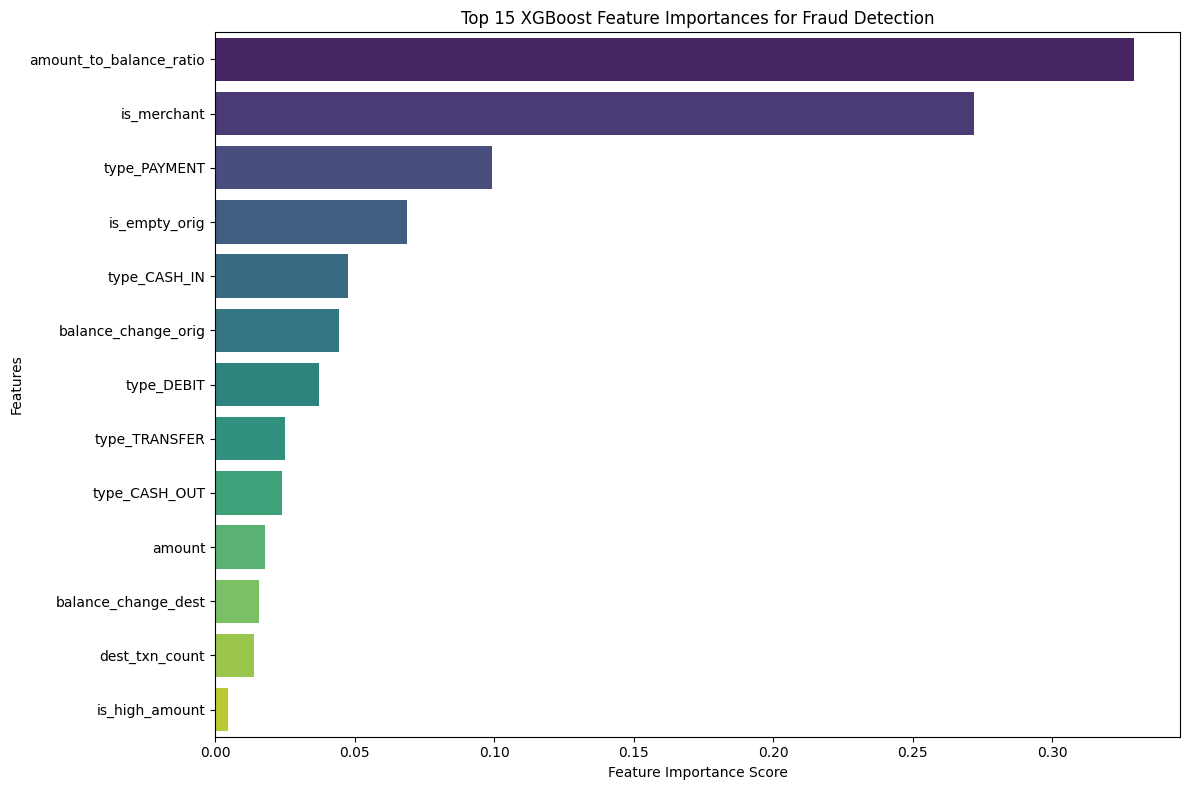


Model training and evaluation completed successfully!
The model demonstrates strong performance in detecting fraudulent transactions.


In [41]:
print("Analyzing Final Feature Importance from Trained XGBoost Model...")

xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_feature_importances_sorted = xgb_feature_importances.sort_values(ascending=False)

print("Top 10 Features by XGBoost Importance:")
for i, (feature, importance) in enumerate(xgb_feature_importances_sorted.head(10).items(), 1):
    print(f"{i:2d}. {feature:<25} {importance:.4f}")

# Visualizing feature importance
plt.figure(figsize=(12, 8))
sns.barplot(
    x=xgb_feature_importances_sorted.head(15).values,
    y=xgb_feature_importances_sorted.head(15).index,
    palette='viridis'
)
plt.title('Top 15 XGBoost Feature Importances for Fraud Detection')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nModel training and evaluation completed successfully!")
print("The model demonstrates strong performance in detecting fraudulent transactions.")